In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv('Zip_MHINC_Pop.csv')

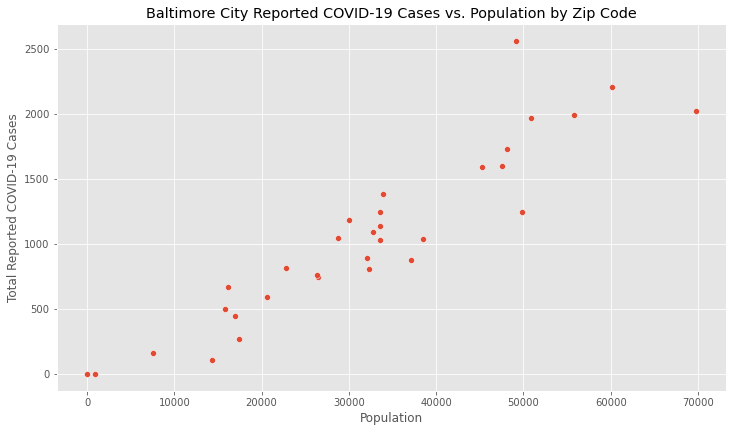

[[1.         0.92594763]
 [0.92594763 1.        ]]


In [39]:
_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = sns.scatterplot(x='Pop2010',y='TotalCases',data=df,legend=False)
_ = plt.xlabel('Population')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Baltimore City Reported COVID-19 Cases vs. Population by Zip Code')
plt.show()
corr = np.corrcoef(df[['Pop2010','TotalCases']],rowvar=False)
print(corr)

In [40]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0,len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

In [41]:
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(df['Pop2010'].to_numpy(),df['TotalCases'].to_numpy(),200)

#95% C.I. for regression line slopes
cis95 = np.percentile(bs_slope_reps,[2.5,97.5])
print(cis95)

[0.03212073 0.04372426]


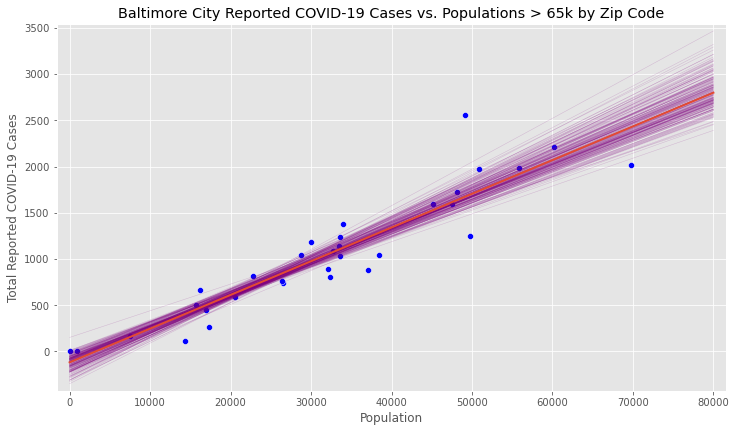

1.0


In [44]:
#linear regression with 100 bootstrap lines 
a,b = np.polyfit(df['Pop2010'],df['TotalCases'],1)
x = np.array([0,80000])
y = a * x + b

_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
for i in range(200):
    _ = plt.plot(x,bs_slope_reps[i]*x + bs_intercept_reps[i],
                linewidth=0.5,alpha=0.2,color='purple')
_ = sns.scatterplot(x='Pop2010',y='TotalCases',data=df,legend=False,color='blue')
_ = plt.plot(x,y,linewidth=2)
_ = plt.xlabel('Population')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Baltimore City Reported COVID-19 Cases vs. Populations > 65k by Zip Code')
plt.margins(.02)
plt.show()

corr = np.corrcoef(pops_greater_65k[['Pop2010','TotalCases']],rowvar=False)
print(corr)

In [45]:
caseArray = df['TotalCases'].to_numpy()
per33 = np.percentile(caseArray,100/3)
print(per33)
per67 = np.percentile(caseArray,((100/3)*2))
print(per67)

776.6666666666667
1222.6666666666667


In [61]:
labelList = []

for index, row in df.iterrows():
    if row['TotalCases'] < 777:
        labelList.append('lowCases')
    elif row['TotalCases'] >= 777:
        if row['TotalCases'] < 1223:
            labelList.append('medCases')
        elif row['TotalCases'] >= 1223:
            labelList.append('highCases')
        
df['classLabel'] = labelList
#df = df.drop('Unnamed: 0',axis=1)
#df = df.drop('Unnamed: 0.1',axis=1)
print(df)


    Zip Code         MHINC  TotalCases  Pop2010 classLabel
0      21201  48044.111111         447    16972   lowCases
1      21202  53117.988889         813    22832   medCases
2      21205  38678.157143         668    16146   lowCases
3      21206  53439.028571        1969    50846  highCases
4      21207  47495.616667        1729    48133  highCases
5      21208  49056.350000        1384    33917  highCases
6      21209  64002.133333         746    26465   lowCases
7      21210  82454.580000         110    14292   lowCases
8      21211  56940.450000         269    17351   lowCases
9      21212  73300.960000         806    32322   medCases
10     21213  38321.400000        1089    32733   medCases
11     21214  59342.820000         593    20564   lowCases
12     21215  47794.718182        2207    60161  highCases
13     21216  39209.887500         893    32071   medCases
14     21217  37689.862500         879    37111   medCases
15     21218  52487.736364        1244    49796  highCas

In [62]:
X_train, X_test, y_train, y_test = \
    train_test_split(df[['Pop2010','MHINC']],\
                     df['classLabel'],test_size=0.3,\
                         random_state=21,stratify=df['classLabel'])

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print('\n')
print(y_pred)
score = knn.score(X_test,y_test)
print('\n')
print(score)
print('\n')



['highCases' 'lowCases' 'medCases' 'highCases' 'lowCases' 'highCases'
 'highCases' 'highCases' 'lowCases' 'medCases']


0.7


